In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv("Week7_train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [7]:
df_sample = df.sample(frac = 0.1 , random_state = 42)
df_sample.shape

(4200, 785)

In [8]:
df_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_sample['label'].unique()

array([8, 1, 9, 6, 2, 7, 3, 4, 5, 0])

In [10]:
df_sample['label'].value_counts()

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [11]:
x = df_sample.drop('label' , axis = 1)
y = df_sample['label']

In [12]:
x.shape

(4200, 784)

In [13]:
y.shape

(4200,)

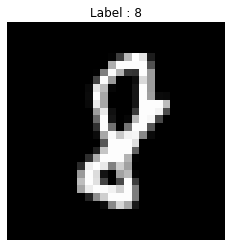

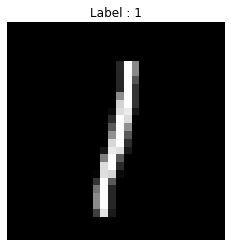

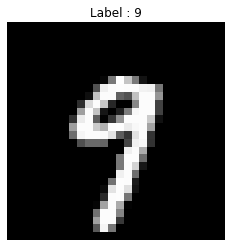

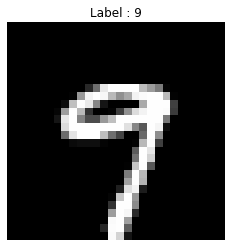

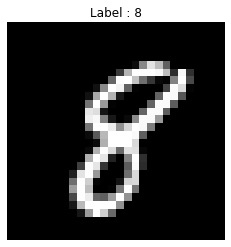

In [17]:
for i in range(5):
    img = x.iloc[i].values.reshape(28,28)
    plt.imshow(img , cmap='gray')
    plt.title(f'Label : {y.iloc[i]}')
    plt.axis('off')
    plt.show()

In [26]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y , test_size = 0.25 , random_state = 42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5 , metric ='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [28]:
y_pred = knn.predict(X_test)
len(y_pred)

1050

In [29]:
X_train.shape

(3150, 784)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 97,   0,   0,   1,   0,   1,   2,   0,   0,   0],
       [  0, 118,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,  81,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0,   1, 122,   0,   4,   0,   1,   1,   3],
       [  0,   0,   0,   0,  88,   0,   2,   0,   0,   5],
       [  0,   1,   0,   2,   0,  80,   1,   1,   0,   0],
       [  0,   1,   0,   0,   0,   0,  98,   0,   0,   0],
       [  0,   9,   1,   0,   0,   0,   0, 104,   0,   4],
       [  0,   5,   1,   3,   0,   1,   2,   2,  89,   3],
       [  1,   2,   0,   1,   3,   0,   0,   5,   0,  94]])

In [33]:
acc = accuracy_score(y_pred,y_test)
acc

0.9247619047619048

In [36]:
cl = classification_report(y_pred,y_test)
print(cl)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        98
           1       1.00      0.83      0.91       142
           2       0.90      0.96      0.93        84
           3       0.92      0.95      0.93       129
           4       0.93      0.97      0.95        91
           5       0.94      0.93      0.94        86
           6       0.99      0.93      0.96       105
           7       0.88      0.90      0.89       116
           8       0.84      0.99      0.91        90
           9       0.89      0.86      0.87       109

    accuracy                           0.92      1050
   macro avg       0.92      0.93      0.93      1050
weighted avg       0.93      0.92      0.92      1050



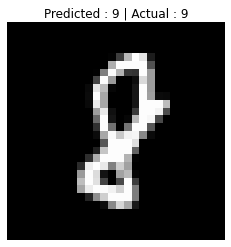

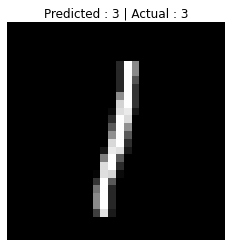

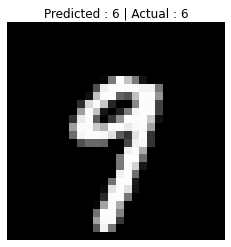

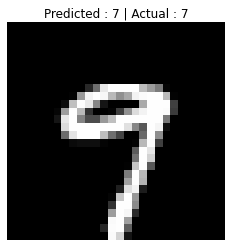

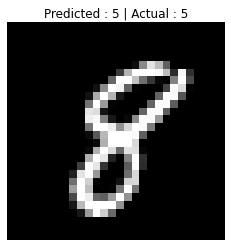

In [38]:
for i in range(5):
    img = x.iloc[i].values.reshape(28,28)
    plt.imshow(img , cmap='gray')
    plt.title(f'Predicted : {y_pred[i]} | Actual : {y_test.iloc[i]}')
    plt.axis('off')
    plt.show()